In [1]:
import pandas as pd
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch the JSON data from the URL
url = "https://margincalculator.angelbroking.com/OpenAPI_File/files/OpenAPIScripMaster.json"
response = requests.get(url, stream=True)

/Users/arpitsingh/Developer/CodeHub/trading-bot-angel/env/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Use tqdm to show progress while downloading
response.iter_content(chunk_size=8192)
total_size = int(response.headers.get('content-length', 0))
download_progress = tqdm(total=total_size, unit='B', unit_scale=True, desc="Downloading JSON")
data = []
for chunk in response.iter_content(chunk_size=8192):
    download_progress.update(len(chunk))
    data.append(chunk)
download_progress.close()

data = b''.join(data).decode('utf-8')
data = eval(data)

In [3]:
# Convert the JSON data to a pandas DataFrame
df = pd.DataFrame(data)

# 1. Check the first few rows of the dataframe
print(df.head())

   token        symbol       name expiry     strike lotsize instrumenttype  \
0  12826  HYBRIDFIN-BL  HYBRIDFIN         -1.000000       1                  
1  10191  SHYAMCENT-BL  SHYAMCENT         -1.000000       1                  
2   7816    731KA35-SG    731KA35         -1.000000     100                  
3  12413       GSFC-BL       GSFC         -1.000000       1                  
4   8510    GATEWAY-EQ    GATEWAY         -1.000000       1                  

  exch_seg tick_size  
0      NSE  5.000000  
1      NSE  5.000000  
2      NSE  1.000000  
3      NSE  5.000000  
4      NSE  5.000000  


In [4]:
# 2. Check the data types of each column
print(df.dtypes)

token             object
symbol            object
name              object
expiry            object
strike            object
lotsize           object
instrumenttype    object
exch_seg          object
tick_size         object
dtype: object


In [6]:
# 3. Get a summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157557 entries, 0 to 157556
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   token           157557 non-null  object
 1   symbol          157557 non-null  object
 2   name            157557 non-null  object
 3   expiry          157557 non-null  object
 4   strike          157557 non-null  object
 5   lotsize         157557 non-null  object
 6   instrumenttype  157557 non-null  object
 7   exch_seg        157557 non-null  object
 8   tick_size       157557 non-null  object
dtypes: object(9)
memory usage: 10.8+ MB
None


exch_seg
BFO      62223
NFO      55441
CDS      13979
BSE      11479
NSE       7925
MCX       4503
NCDEX     2007
Name: count, dtype: int64


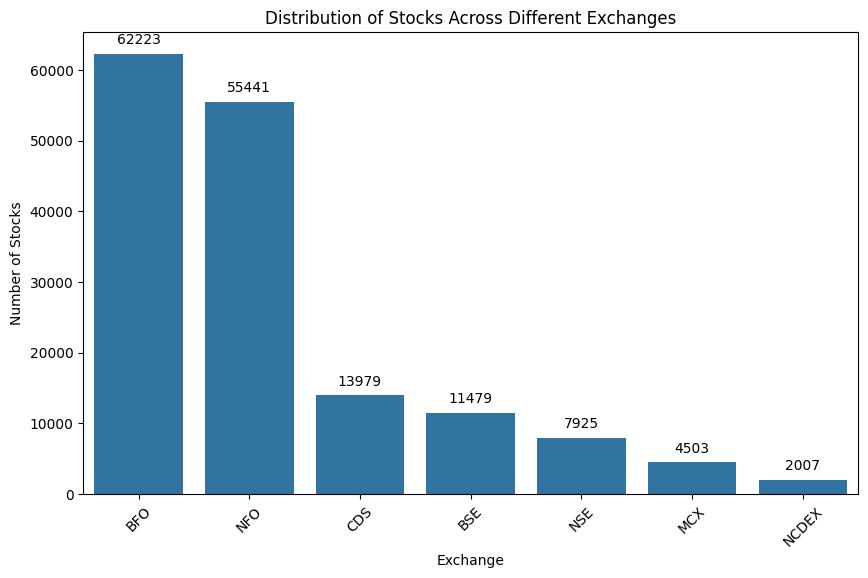

In [7]:
# Get the distribution of stocks across different exchanges
exchange_distribution = df['exch_seg'].value_counts()

# Print the distribution
print(exchange_distribution)

# Plotting the distribution
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=exchange_distribution.index, y=exchange_distribution.values)
plt.title('Distribution of Stocks Across Different Exchanges')
plt.xlabel('Exchange')
plt.ylabel('Number of Stocks')
plt.xticks(rotation=45)

# Annotating each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()

instrumenttype
OPTSTK    50356
OPTIDX     4505
FUTSTK      568
FUTIDX       12
Name: count, dtype: int64


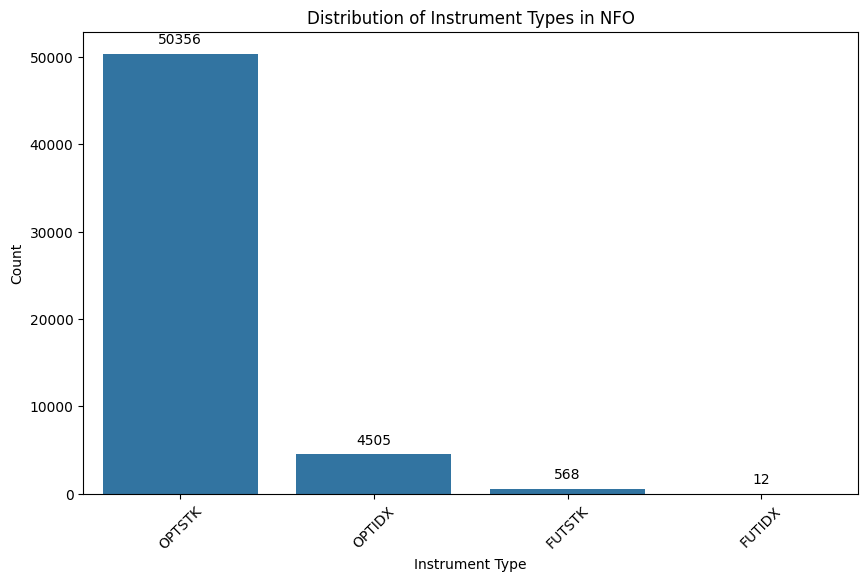

In [8]:
# Filter the dataframe for rows where 'exch_seg' is 'NFO'
nfo_data = df[df['exch_seg'] == 'NFO']

# Get the distribution of different instrument types
instrument_distribution = nfo_data['instrumenttype'].value_counts()

# Print the distribution
print(instrument_distribution)

# Plotting the distribution
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=instrument_distribution.index, y=instrument_distribution.values)
plt.title('Distribution of Instrument Types in NFO')
plt.xlabel('Instrument Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Annotating each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.show()


In [9]:
# Filter the dataframe for rows where 'exch_seg' is 'NFO' and 'instrumenttype' is 'OPTIDX'
filtered_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX')]

# Get the unique names
unique_names = filtered_data['name'].unique()

# Print the unique names
print(unique_names)


['FINNIFTY' 'NIFTY' 'MIDCPNIFTY' 'BANKNIFTY']


In [10]:
# Filter the dataframe for rows where 'exch_seg' is 'NFO' and 'instrumenttype' is 'OPTIDX'
filtered_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX')]

# Get the count of names 'NIFTY' and 'BANKNIFTY'
name_counts = filtered_data['name'].value_counts()

# Print the counts for 'NIFTY' and 'BANKNIFTY'
nifty_count = name_counts.get('NIFTY', 0)
banknifty_count = name_counts.get('BANKNIFTY', 0)

print(f"Count for NIFTY: {nifty_count}")
print(f"Count for BANKNIFTY: {banknifty_count}")


Count for NIFTY: 1286
Count for BANKNIFTY: 1205


In [11]:
# Filter for 'NIFTY' with conditions 'exch_seg' is 'NFO' and 'instrumenttype' is 'OPTIDX'
nifty_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['name'] == 'NIFTY')]

# Filter for 'BANKNIFTY' with conditions 'exch_seg' is 'NFO' and 'instrumenttype' is 'OPTIDX'
banknifty_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['name'] == 'BANKNIFTY')]

# Extract the date range for 'NIFTY'
nifty_min_date = nifty_data['expiry'].min()
nifty_max_date = nifty_data['expiry'].max()

# Extract the date range for 'BANKNIFTY'
banknifty_min_date = banknifty_data['expiry'].min()
banknifty_max_date = banknifty_data['expiry'].max()

# Print the date ranges
print(f"NIFTY expiry date range: {nifty_min_date} to {nifty_max_date}")
print(f"BANKNIFTY expiry date range: {banknifty_min_date} to {banknifty_max_date}")


NIFTY expiry date range: 02NOV2023 to 31DEC2026
BANKNIFTY expiry date range: 01NOV2023 to 30NOV2023


In [12]:
# Filter for 'NIFTY' with conditions 'exch_seg' is 'NFO' and 'instrumenttype' is 'OPTIDX'
nifty_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['name'] == 'NIFTY')]

# Filter for 'BANKNIFTY' with conditions 'exch_seg' is 'NFO' and 'instrumenttype' is 'OPTIDX'
banknifty_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['name'] == 'BANKNIFTY')]

# Check for 'OCT' expiry dates in 'NIFTY'
nifty_oct_data = nifty_data[nifty_data['expiry'].str.contains('OCT')]

# Check for 'OCT' expiry dates in 'BANKNIFTY'
banknifty_oct_data = banknifty_data[banknifty_data['expiry'].str.contains('OCT')]

# Print the 'OCT' expiry dates
print("NIFTY October expiry dates:")
print(nifty_oct_data['expiry'])

print("\nBANKNIFTY October expiry dates:")
print(banknifty_oct_data['expiry'])


NIFTY October expiry dates:
19620    26OCT2023
20914    26OCT2023
21503    26OCT2023
21619    26OCT2023
22241    26OCT2023
           ...    
73849    26OCT2023
73850    26OCT2023
73894    26OCT2023
74312    26OCT2023
74604    26OCT2023
Name: expiry, Length: 160, dtype: object

BANKNIFTY October expiry dates:
19472    26OCT2023
19562    26OCT2023
19719    26OCT2023
19970    26OCT2023
20253    26OCT2023
           ...    
72739    26OCT2023
72864    26OCT2023
73248    26OCT2023
74074    26OCT2023
74452    26OCT2023
Name: expiry, Length: 182, dtype: object


In [13]:
# Filter for 'NIFTY' with conditions 'exch_seg' is 'NFO' and 'instrumenttype' is 'OPTIDX'
nifty_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['name'] == 'NIFTY')]

# Filter for 'BANKNIFTY' with conditions 'exch_seg' is 'NFO' and 'instrumenttype' is 'OPTIDX'
banknifty_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['name'] == 'BANKNIFTY')]

# Extract the date range for 'NIFTY'
nifty_min_date = nifty_data['expiry'].min()
nifty_max_date = nifty_data['expiry'].max()

print(nifty_min_date)
print(nifty_max_date)

02NOV2023
31DEC2026


The issue you're encountering might be due to the data type of the expiry column. Since the expiry column is of type object (which is essentially a string in pandas), the min() and max() functions are performing lexicographical (string-based) comparisons rather than date-based comparisons. This can lead to unexpected results.

In [14]:
# Convert the 'expiry' column to datetime format
df['expiry'] = pd.to_datetime(df['expiry'], errors='coerce', format='%d%b%Y')

# Filter for 'NIFTY' with conditions 'exch_seg' is 'NFO' and 'instrumenttype' is 'OPTIDX'
nifty_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['name'] == 'NIFTY')]

# Filter for 'BANKNIFTY' with conditions 'exch_seg' is 'NFO' and 'instrumenttype' is 'OPTIDX'
banknifty_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['name'] == 'BANKNIFTY')]

# Extract the date range for 'NIFTY'
nifty_min_date = nifty_data['expiry'].min()
nifty_max_date = nifty_data['expiry'].max()

# Extract the date range for 'BANKNIFTY'
banknifty_min_date = banknifty_data['expiry'].min()
banknifty_max_date = banknifty_data['expiry'].max()

# Convert the datetime objects back to the desired format
formatted_nifty_min_date = nifty_min_date.strftime('%d%b%Y')
formatted_nifty_max_date = nifty_max_date.strftime('%d%b%Y')

# Convert the datetime objects back to the desired format
formatted_banknifty_min_date = banknifty_min_date.strftime('%d%b%Y')
formatted_banknifty_max_date = banknifty_max_date.strftime('%d%b%Y')

# Print the date ranges
print(f"NIFTY expiry date range: {formatted_nifty_min_date} to {formatted_nifty_max_date}")
print(f"BANKNIFTY expiry date range: {formatted_banknifty_min_date} to {formatted_banknifty_max_date}")

NIFTY expiry date range: 26Oct2023 to 29Jun2028
BANKNIFTY expiry date range: 26Oct2023 to 26Sep2024


In [24]:
# Convert the 'expiry' column to datetime format
df['expiry'] = pd.to_datetime(df['expiry'], errors='coerce', format='%d%b%Y')

# Filter for 'NIFTY', 'exch_seg' is 'NFO', 'instrumenttype' is 'OPTIDX', and expiry date is '5th Oct'
nifty_25th_oct_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['name'] == 'NIFTY') & (df['expiry'] == '2023-10-25')]

# Get the counts of each unique strike price and sort them in ascending order
strike_counts = nifty_25th_oct_data['strike'].value_counts().sort_index(ascending=True)

print(f"Strike prices (in ascending order) and their counts for NIFTY on 25th Oct:\n{strike_counts}")


Strike prices (in ascending order) and their counts for NIFTY on 25th Oct:
Series([], Name: count, dtype: int64)


In [23]:
# Convert the 'expiry' column to datetime format
df['expiry'] = pd.to_datetime(df['expiry'], errors='coerce', format='%d%b%Y')

# Filter for 'BANKNIFTY', 'exch_seg' is 'NFO', 'instrumenttype' is 'OPTIDX', and expiry date is '4th Oct'
banknifty_26th_oct_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['name'] == 'BANKNIFTY') & (df['expiry'] == '2023-10-26')]

# Get the counts of each unique strike price and sort them in ascending order
strike_counts_banknifty = banknifty_26th_oct_data['strike'].value_counts().sort_index(ascending=True)

print(f"Strike prices (in ascending order) and their counts for BANKNIFTY on 26th Oct:\n{strike_counts_banknifty}")


Strike prices (in ascending order) and their counts for BANKNIFTY on 26th Oct:
strike
3750000.000000    2
3800000.000000    2
3850000.000000    2
3900000.000000    2
3950000.000000    2
                 ..
5000000.000000    2
5050000.000000    2
5100000.000000    2
5150000.000000    2
5200000.000000    2
Name: count, Length: 91, dtype: int64


In [27]:
import pandas as pd

def get_nifty_token(df, expiry, strike_price):
    # Convert the 'expiry' column to datetime format
    df['expiry'] = pd.to_datetime(df['expiry'], errors='coerce', format='%d%b%Y')
    
    # Filter the dataframe based on the conditions
    filtered_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['name'] == 'NIFTY') & (df['expiry'] == pd.to_datetime(expiry, format='%d%b%Y')) & (df['strike'] == strike_price)]
    
    # Return the token if found, else return None
    if not filtered_data.empty:
        return filtered_data['token'].iloc[0]
    else:
        return None

# Example usage:
token = get_nifty_token(df, '26OCT2023', '2000000.000000')
print(token)


67320


The discrepancy you're observing is due to the representation of the strike price in the dataset. In the provided JSON structure, the strike price seems to be represented in paise (or the smallest currency unit) rather than in rupees. 

In many financial datasets, especially those dealing with stock markets, it's common to represent amounts in the smallest currency unit to avoid floating point numbers. This ensures precision, as floating point numbers can introduce rounding errors.

In the case of the Indian Rupee, 1 Rupee = 100 Paise. So, a strike price of 20,000 Rupees is represented as 2,000,000 Paise (or '2000000.000000' in the dataset).

When you're querying the dataset or working with such data, you'll need to convert your values to the same representation used in the dataset. In this case, if you're thinking in terms of rupees, you'll need to multiply by 100 to get the value in paise before querying.

In [28]:
import pandas as pd

def get_nifty_token(df, expiry, strike_price_in_rupees):
    # Convert the strike price from rupees to paise
    strike_price_in_paise = str(int(strike_price_in_rupees * 100)) + ".000000"
    
    # Convert the 'expiry' column to datetime format
    df['expiry'] = pd.to_datetime(df['expiry'], errors='coerce', format='%d%b%Y')
    
    # Filter the dataframe based on the conditions
    filtered_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['name'] == 'NIFTY') & (df['expiry'] == pd.to_datetime(expiry, format='%d%b%Y')) & (df['strike'] == strike_price_in_paise)]
    
    # Return the token if found, else return None
    if not filtered_data.empty:
        return filtered_data['token'].iloc[0]
    else:
        return None

# Example usage:
token = get_nifty_token(df, '26OCT2023', 19600)
print(token)


67305


In [29]:
def get_nifty_token(df, expiry, strike_and_option_type):
    # Extract the strike price and option type from the input
    strike_price_in_rupees = int(strike_and_option_type[:-2])
    option_type = strike_and_option_type[-2:]
    
    # Convert the strike price from rupees to paise
    strike_price_in_paise = str(strike_price_in_rupees * 100) + ".000000"
    
    # Convert the 'expiry' column to datetime format
    df['expiry'] = pd.to_datetime(df['expiry'], errors='coerce', format='%d%b%Y')
    
    # Construct the symbol based on the input and filter conditions
    symbol_pattern = f"NIFTY{expiry}{strike_price_in_paise}{option_type}"
    
    # Filter the dataframe based on the conditions
    filtered_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['symbol'] == symbol_pattern)]
    
    # Return the token if found, else return None
    if not filtered_data.empty:
        return filtered_data['token'].iloc[0]
    else:
        return None

# Example usage:
token = get_nifty_token(df, '26OCT2023', '20000CE')
print(token)


None


In [34]:
def get_nifty_token(df, expiry, strike_and_option_type):
    # Extract the strike price and option type from the input
    strike_price_in_rupees = int(strike_and_option_type[:-2])
    option_type = strike_and_option_type[-2:]
    
    # Convert the strike price from rupees to paise
    strike_price_in_paise = str(strike_price_in_rupees * 100) + ".000000"
    
    # Convert the 'expiry' column to datetime format
    df['expiry'] = pd.to_datetime(df['expiry'], errors='coerce', format='%d%b%Y')

    # Construct the symbol based on the input and filter conditions
    symbol_pattern = f"NIFTY{expiry}{strike_price_in_paise}{option_type}"

    print(f"Constructed Symbol: {symbol_pattern}")  # Let's print the constructed symbol

    # Filter the dataframe based on the conditions
    filtered_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['symbol'] == symbol_pattern)]

    # Return the token if found, else return None
    if not filtered_data.empty:
        return filtered_data['token'].iloc[0]
    else:
        return None

# Example usage:
token = get_nifty_token(df, '05OCT2023', '20000CE')
print(token)


Constructed Symbol: NIFTY05OCT20232000000.000000CE
None


In [30]:
def get_nifty_token(df, expiry, strike_and_option_type):
    # Extract the strike price and option type from the input
    strike_price_in_rupees = int(strike_and_option_type[:-2])
    option_type = strike_and_option_type[-2:]
    
    # Convert the 'expiry' column to datetime format for filtering
    df['expiry'] = pd.to_datetime(df['expiry'], errors='coerce', format='%d%b%Y')
    
    # Construct the symbol based on the input and filter conditions
    day_month = expiry[:5]
    year_last_two_digits = expiry[-2:]
    symbol_pattern = f"NIFTY{day_month}{year_last_two_digits}{strike_price_in_rupees}{option_type}"
    print(symbol_pattern)
    
    # Filter the dataframe based on the conditions
    filtered_data = df[(df['exch_seg'] == 'NFO') & (df['instrumenttype'] == 'OPTIDX') & (df['symbol'] == symbol_pattern)]
    
    # Return the token if found, else return None
    if not filtered_data.empty:
        return filtered_data['token'].iloc[0]
    else:
        return None

# Example usage:
token = get_nifty_token(df, '26OCT2023', '20000CE')
print(token)


NIFTY26OCT2320000CE
67320


In [33]:
def get_token_by_symbol(df, name, expiry, strike_and_option_type):
    # Extract the strike price and option type from the input
    strike_price_in_rupees = int(strike_and_option_type[:-2])
    option_type = strike_and_option_type[-2:]
    
    # Construct the symbol based on the input
    day_month = expiry[:5]
    year_last_two_digits = expiry[-2:]
    symbol_pattern = f"{name}{day_month}{year_last_two_digits}{strike_price_in_rupees}{option_type}"
    print(symbol_pattern)
    
    # Filter the dataframe based on the constructed symbol
    filtered_data = df[df['symbol'] == symbol_pattern]
    
    # Return the token if found, else return None
    if not filtered_data.empty:
        return filtered_data['token'].iloc[0]
    else:
        return None

# Example usage:
token = get_token_by_symbol(df, 'BANKNIFTY', '26OCT2023', '44500PE')
print(token)


BANKNIFTY26OCT2344500PE
64492


## Error Handling (Final Code)

In [36]:
def get_token_by_symbol(df, name, expiry, strike_and_option_type):
    try:
        # Check if strike_and_option_type is in the expected format
        if not (strike_and_option_type[-2:].upper() in ['CE', 'PE'] and strike_and_option_type[:-2].isdigit()):
            raise ValueError("Invalid format for strike_and_option_type. Expected format: 'valueCE' or 'valuePE'.")
        
        # Extract the strike price and option type from the input
        strike_price_in_rupees = int(strike_and_option_type[:-2])
        option_type = strike_and_option_type[-2:].upper()
        
        # Check if expiry is in the expected format
        try:
            pd.to_datetime(expiry, format='%d%b%Y')
        except:
            raise ValueError("Invalid format for expiry. Expected format: 'ddMMMyyyy'.")
        
        # Construct the symbol based on the input
        day_month = expiry[:5]
        year_last_two_digits = expiry[-2:]
        symbol_pattern = f"{name}{day_month}{year_last_two_digits}{strike_price_in_rupees}{option_type}"
        print(f"Constructed Symbol: {symbol_pattern}")
        
        # Filter the dataframe based on the constructed symbol
        filtered_data = df[df['symbol'] == symbol_pattern]
        
        # Return the token if found, else raise an error
        if not filtered_data.empty:
            return filtered_data['token'].iloc[0]
        else:
            raise ValueError(f"No matching token found for symbol: {symbol_pattern}")
    
    except ValueError as ve:
        print(f"Error: {ve}")
        return None
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None

# Example usage:
token = get_token_by_symbol(df, 'NIFTY', '26OCT2023', '20500PE')
print(token)


Constructed Symbol: NIFTY26OCT2320500PE
67341
